# SaaS Sales Dataset Analysis

## A. Introduction

Software as a Service (SaaS) is a cloud-based delivery model where applications are hosted centrally and accessed through the internet. The industry is characterized by recurring revenue from subscription models, high scalability with low marginal costs, and increasing competition across global markets. However, SaaS companies face global challenges such as uneven revenue distribution across regions, high customer acquisition costs that threaten profitability, and the fact that profitability does not always align with sales volume. Regional performance differences also create challenges, as EMEA, AMER, and APJ markets show distinct sales and profit dynamics. Some regions generate high sales but deliver lower profit margins, while others face varying levels of market saturation and operational costs. The objective of this research is to evaluate regional profit-to-sales efficiency in the SaaS industry and determine which regions are most profitable relative to revenue.

To address these challenges, we conduct a two-part analysis:  

1. **Descriptive Analysis**  
   - Track sales trends and seasonal patterns.  
   - Identify high and low value customer segments.  
   - Measure revenue concentration among top customers.  
   - Compare sales contributions across regions.

2. **Statistical Analysis**  
   - Test whether average sales differ significantly across product categories.  
   - Assess regional efficiency by comparing profit-to-sales ratios.  
   - Evaluate whether order values vary significantly between regions.  
   - Investigate whether Average City Sales Differ Between AMER, EMEA, and APJ.  

## A.1 Objective 

By combining descriptive insights with statistical validation, this analysis moves beyond observation into **evidence-based decision making**.  
The ultimate goal is to provide **actionable recommendations** for:  
- Reducing churn risks,  
- Diversifying revenue sources,  
- Optimizing regional strategies, and  
- Prioritizing product categories for growth.  

This notebook walks through the full process — from exploring the data, visualizing trends, testing hypotheses, and finally generating **business insights** that guide strategy.

## B. Business Question
How can we optimize product offerings, pricing strategies, and customer targeting to maximize revenue and profitability across different segments, regions, and industries?
- Descriptive Analysis
  - Sales and Customer Performance Analysis
    - How have total sales evolved over the last quarters?
    - Which customer segments show low spending patterns that indicate a higher risk of churn?
    - Who are our top revenue-generating customers, and how concentrated is sales contribution among them?
    - Which regions contribute the most to sales, and are there significant differences in performance across regions?
- Statistical Analysis
  - Sales Performance
    - Do average sales per customer differ significantly across product categories?
    - Which region generates the highest profit relative to sales?
    - Does average order value vary between regions?
      
By addressing these questions, we aim to uncover data-driven strategies to enhance growth, retention, and operational efficiency for the SaaS business.

## C. Data Preprocessing

In [6]:
# Import Libraries #
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats

In [7]:
# Reding Dataset #
df = pd.read_csv(r'C:/Users/USER/Desktop/Data Science Purwadhika/Capstone 2/Saas-Sales.csv')

In [8]:
# Dataset Loading and Information #
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


#### Column Description
- Row ID       : Unique identifier for each row
- Order ID     : Unique ID representing a specific sales order
- Order Date   : Date the order was placed
- Date Key     : Numeric version of the order date (YYYYMMDD)
- Contact Name : Name of the customer contact person
- Country      : Country where the customer is located
- City         : City where the customer is located
- Region       : Sales region (e.g., AMER, EMEA, APJ), AMER: North, Central, and South America, EMEA: Europe, Middle East, and Africa, APJ: Asia Pacific
- Subregion    : More specific geographical subregion
- Customer     : Name of the customer/company
- Customer ID  : Unique identifier for each customer
- Industry     : Industry category the customer belongs to
- Segment      : Customer classification
- Product      : Product or service purchased
- License      : License ID or code tied to the product
- Sales        : Gross sales amount before discounts
- Quantity     : Number of units sold
- Discount     : Discount rate applied to the sale
- Profit       : Net profit after costs and discounts

### Data Cleaning and Formatting


In [11]:
# Convert Order Date to datetime #

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df

#buang column date key#

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [12]:
# Check for Null #

df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
df.duplicated().value_counts()

False    9994
Name: count, dtype: int64

In [14]:
# Remove Duplicates #

df.drop_duplicates(inplace=True)

In [15]:
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


### Feature Engineering
In this section, we enhance the original dataset by creating new, insightful features that make our analysis more powerful and meaningful. These engineered features help us uncover hidden patterns, enable time-based analysis, and prepare the data for statistical testing and segmentation.

#### Customer Tenure
Calculating number of days a customer come back to buy a product

In [18]:
# Filter first and last purchase from Order Date column #
first_purchase = df[['Order Date']].min()
last_purchase = df[['Order Date']].max()

# Group by customer with first and last purchcase #

df_customer_purchase = df.groupby('Customer')['Order Date'].agg( first_purchase='min', last_purchase='max').reset_index()
df_customer_purchase.columns = ['Customer', 'First Purchase', 'Last Purchase']
 
# Calcuate the tenure days #
df_customer_purchase['Tenure in Days'] = (df_customer_purchase['Last Purchase'] - df_customer_purchase['First Purchase']).dt.days

df_customer_purchase

,Customer,First Purchase,Last Purchase,Tenure in Days
0,AT&T,2020-03-11,2023-12-22,1381
1,Abbott Laboratories,2020-04-15,2023-12-19,1343
2,Aetna,2020-03-31,2023-12-10,1349
3,Airbus,2020-01-11,2023-12-04,1423
4,Allianz,2020-03-17,2023-12-30,1383
...,...,...,...,...
94,Volkswagen,2020-02-07,2023-12-10,1402
95,Walgreens,2020-02-12,2023-12-17,1404
96,Walmart,2020-03-04,2023-12-11,1377
97,Walt Disney,2020-04-02,2023-12-09,1346


#### Average Order Value
Amount of money a customer spends per order on average.

In [20]:
df_avg_order = df.groupby('Customer')[['Sales', 'Quantity']].sum().reset_index()

df_avg_order['Average Order'] = (df_avg_order['Sales']/df_avg_order['Quantity'])
df_avg_order.columns = ['Customer', 'Total Sales', 'Total Quantity', 'Average Order']
df_avg_order

,Customer,Total Sales,Total Quantity,Average Order
0,AT&T,29462.3240,536,54.967022
1,Abbott Laboratories,12617.1140,266,47.432759
2,Aetna,27278.5930,608,44.866107
3,Airbus,29798.5930,458,65.062430
4,Allianz,42904.1670,709,60.513635
...,...,...,...,...
94,Volkswagen,35200.4240,475,74.106156
95,Walgreens,14420.6190,241,59.836593
96,Walmart,21508.1790,422,50.967249
97,Walt Disney,29483.0050,374,78.831564


#### Extracting Year, Month, and Day
To enable time-based analysis, we extract the year, month, and day from the Order Date column using pandas datetime functions.

In [22]:
# Extract Year #
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

- **Year** helps track long-term performance and trends across multiple years.
- **Month** supports monthly trend analysis, seasonal behavior, and forecasting.
- **Day** allows for fine-grained daily sales tracking or to build date hierarchies.

#### Profit to Rate Ratio

In [25]:
# Profit to Sales Ratio #
profit_sales_ratio = df['Profit'] / df['Sales']

In [26]:
# Add Profit to Sales Ratio Column #
df['Profit Sales Ratio'] = profit_sales_ratio
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Product,License,Sales,Quantity,Discount,Profit,Year,Month,Day,Profit Sales Ratio
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022,11,9,0.1600
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022,11,9,0.3000
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022,6,13,0.4700
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021,10,11,-0.4000
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,2021,10,11,0.1125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,...,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,2020,1,22,0.1625
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,2023,2,27,0.1700
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,2023,2,27,0.0750
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,2023,2,27,0.4500


## D. Exploratory Data Analysis

### D.1 Descriptive Analysis 

#### D.1.1 Company's Sales performance Over Time On a Quarterly Basis

In [30]:
february_sales = df[df['Month'] == 2]['Sales'].dropna()
november_sales = df[df['Month'] == 11]['Sales'].dropna()

In [31]:
import matplotlib.pyplot as plt

In [32]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum()
df_monthly_sales = monthly_sales.reset_index()
df_monthly_sales['Year'] = df_monthly_sales['Year'].astype(str)
df_monthly_sales['Month'] = df_monthly_sales['Month'].astype(str)

In [33]:
# Convert to date time format #
df_monthly_sales['Date'] = df_monthly_sales['Year'] + ' ' + df_monthly_sales['Month']
df_monthly_sales['Date'] = pd.to_datetime(df_monthly_sales['Date'])
df_monthly_sales['Quarter'] = df_monthly_sales['Date'].dt.to_period('Q').astype(str)
df_monthly_sales['Year_Q'] = df_monthly_sales['Date'].dt.year.astype(str) + ' Q' + df_monthly_sales['Date'].dt.quarter.astype(str)
df_monthly_sales.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_17276\1540916037.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_monthly_sales['Date'] = pd.to_datetime(df_monthly_sales['Date'])


,Year,Month,Sales,Date,Quarter,Year_Q
0,2020,1,13946.229,2020-01-01,2020Q1,2020 Q1
1,2020,2,4810.558,2020-02-01,2020Q1,2020 Q1
2,2020,3,55691.009,2020-03-01,2020Q1,2020 Q1
3,2020,4,28295.345,2020-04-01,2020Q2,2020 Q2
4,2020,5,23648.287,2020-05-01,2020Q2,2020 Q2


C:\Users\USER\AppData\Local\Temp\ipykernel_17276\3966343335.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


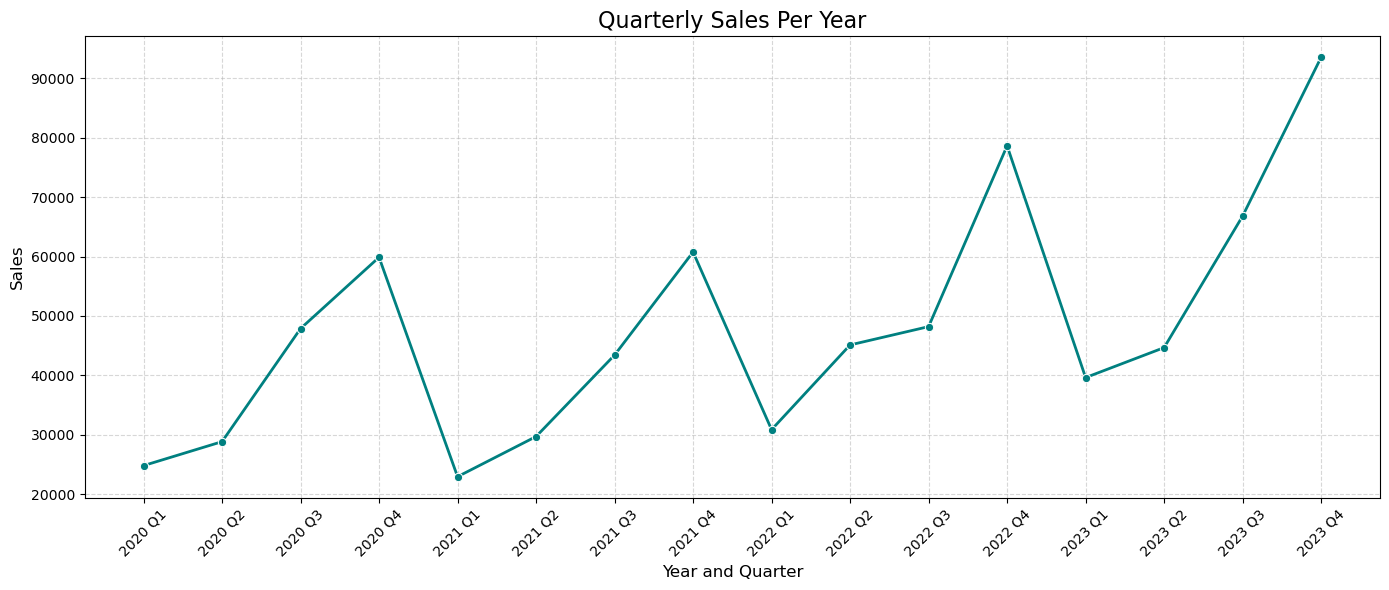

In [160]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df_monthly_sales,
    x='Year_Q',
    y='Sales',
    marker='o',
    linewidth=2,
    color='teal',
    ci = None)
#sns.regplot(data=df_monthly_sales, x="Year_Q", y="mpg", order=2)

plt.title('Quarterly Sales Per Year', fontsize=16)
plt.xlabel('Year and Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Insight:
- Sales typically peak at Q4 each year.
- Least sales slump at Q1 each year.

#### D.1.2 Customer Segments That Are at Risk of Churning
Segments customer into 3 categories:
- Top spender (Top)
- Average spender (Average)
- Low spender (Low)

In [37]:
# Aggregate Customer Data #
df_cust_tier = df.groupby('Customer').agg({'Order ID' : 'nunique', 'Sales' : 'sum'}).reset_index()
df_cust_tier

,Customer,Order ID,Sales
0,AT&T,67,29462.3240
1,Abbott Laboratories,31,12617.1140
2,Aetna,76,27278.5930
3,Airbus,58,29798.5930
4,Allianz,102,42904.1670
...,...,...,...
94,Volkswagen,65,35200.4240
95,Walgreens,33,14420.6190
96,Walmart,46,21508.1790
97,Walt Disney,53,29483.0050


In [38]:
# Create new df for cust_tier #

df_cust_tier.columns = ['Customer', 'Total Orders', 'Total Sales']
df_cust_tier

,Customer,Total Orders,Total Sales
0,AT&T,67,29462.3240
1,Abbott Laboratories,31,12617.1140
2,Aetna,76,27278.5930
3,Airbus,58,29798.5930
4,Allianz,102,42904.1670
...,...,...,...
94,Volkswagen,65,35200.4240
95,Walgreens,33,14420.6190
96,Walmart,46,21508.1790
97,Walt Disney,53,29483.0050


In [39]:
# Sort based on sales #
df_cust_tier = df_cust_tier.sort_values(by = 'Total Sales', ascending = False)
df_cust_tier

,Customer,Total Orders,Total Sales
10,Anthem,58,55719.2100
38,Ford Motor,103,43893.0424
4,Allianz,102,42904.1670
16,Bank of America Corp.,65,41255.9471
92,Valero Energy,58,41220.4188
...,...,...,...
86,Tesco,24,8173.2260
17,Berkshire Hathaway,25,7100.9290
78,Safeway,20,6633.1370
27,Citigroup,13,6132.5210


In [40]:
# Determine the Quartile #
q25 = df_cust_tier['Total Sales'].quantile(0.25)
q50 = df_cust_tier['Total Sales'].quantile(0.5)
q75 = df_cust_tier['Total Sales'].quantile(0.75)

In [41]:
# Create Tiering #
def cust_tiering(sales):
    if sales >= q75:
        return 'High Spender'
    elif sales >= q50:
        return 'Medium Spender'
    else:
        return 'Low Spender'

In [42]:
# Assign Tiering #
df_cust_tier['Tier'] = df_cust_tier['Total Sales'].apply(cust_tiering)
df_cust_tier = df_cust_tier.sort_values(by='Total Sales', ascending=False).reset_index(drop=True)

In [43]:
tier_order = ['High Spender', 'Medium Spender', 'Low Spender'] 
df_cust_tier['Tier'] = pd.Categorical(df_cust_tier['Tier'], categories=tier_order, ordered=True)
df_cust_tier = df_cust_tier.sort_values(by=['Tier', 'Total Sales'], ascending=[True, False])
df_cust_tier

,Customer,Total Orders,Total Sales,Tier
0,Anthem,58,55719.2100,High Spender
1,Ford Motor,103,43893.0424,High Spender
2,Allianz,102,42904.1670,High Spender
3,Bank of America Corp.,65,41255.9471,High Spender
4,Valero Energy,58,41220.4188,High Spender
...,...,...,...,...
94,Tesco,24,8173.2260,Low Spender
95,Berkshire Hathaway,25,7100.9290,Low Spender
96,Safeway,20,6633.1370,Low Spender
97,Citigroup,13,6132.5210,Low Spender


In [44]:
df_tier_count = (df_cust_tier.groupby('Tier').size().reset_index(name='Tier Count'))
df_tier_count

C:\Users\USER\AppData\Local\Temp\ipykernel_17276\764293309.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tier_count = (df_cust_tier.groupby('Tier').size().reset_index(name='Tier Count'))


,Tier,Tier Count
0,High Spender,25
1,Medium Spender,25
2,Low Spender,49


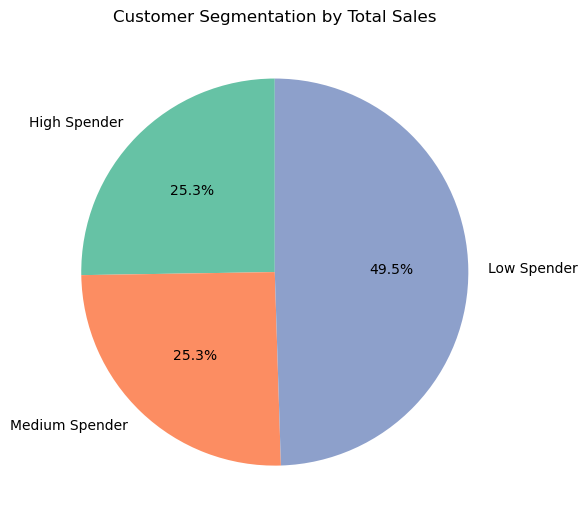

In [164]:
# Plotting #
data = df_tier_count

plt.figure(figsize=(6,6))
plt.pie(
    data['Tier Count'],
    labels=data['Tier'],            # labels on slices
    autopct='%1.1f%%',              # percentage format
    startangle=90,                  # rotate start
    colors=sns.color_palette('Set2', len(data))  # same palette as before
)

plt.title("Customer Segmentation by Total Sales", fontsize=12)
plt.tight_layout()
plt.show()

Insight:
- Based on total sales, most of the customers are considered to be Low Spender which is the highest amongst the 3 category
- Low spender customers can be most at risk to churn

### D.1.3 Most Valuable Customers by Sales

C:\Users\USER\AppData\Local\Temp\ipykernel_17276\2627682113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


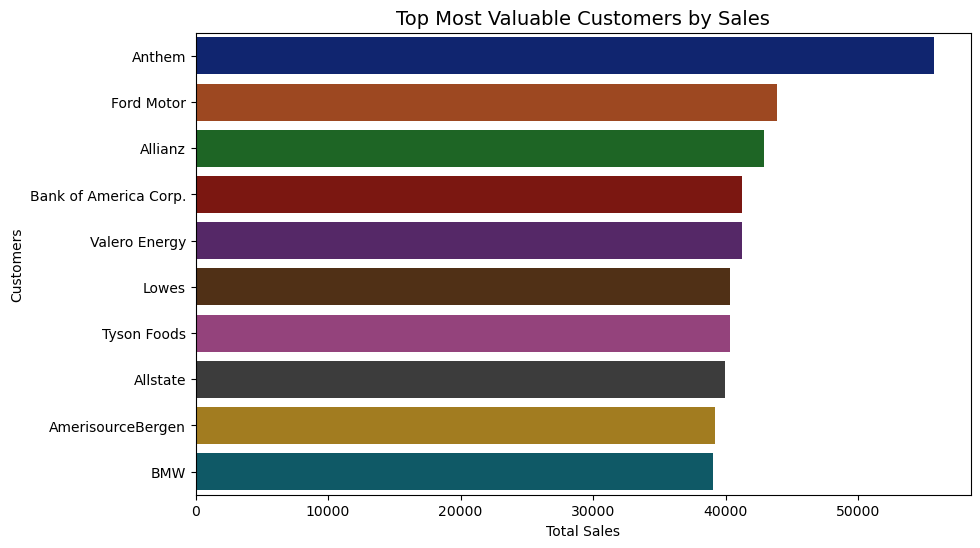

In [176]:
# Plot #
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_cust_tier.head(10),
    x='Total Sales',
    y='Customer',
    palette='dark'
)
plt.title(f"Top Most Valuable Customers by Sales", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Customers")
plt.savefig("Top Most Valuable Customers by Sales.png", dpi=300, bbox_inches="tight")

plt.show()

Insight:
- Anthem has the highest total sales
- The top 3 are Anthem, Ford Motor, and Alianz

#### D.1.4 Top Products by Sales and Profit

In [51]:
top_products = df.groupby('Product')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(10)
top_products

,Sales,Profit
Product,,
ContactMatcher,410378.2650,12496.2822
FinanceHub,340935.4150,32136.4203
Site Analytics,330007.0540,44515.7306
Marketing Suite - Gold,223843.6080,21278.8264
Big Ol Database,189238.6310,3384.7569
Data Smasher,167380.3180,41936.6357
Alchemy,149528.0300,55617.8249
Support,125152.7440,32864.4698
Marketing Suite,114879.9963,-3472.5560


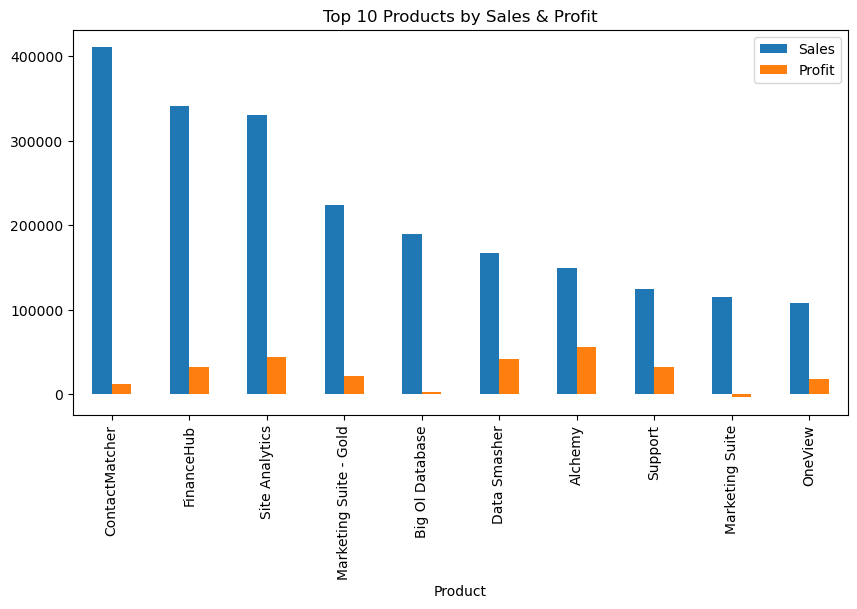

In [172]:
top_products.plot(kind='bar', figsize=(10,5), title="Top 10 Products by Sales & Profit")
plt.show()

Insight:
- High sales does not equate to high profit:
  - ContactMatcher, FinanceHub, and Site Analytics are the top 3 product sold.
  - Alchemy has the highest profit compared to other products
  

#### D.1.5 Regional Sales Performance

In [55]:
# Groupby Region with Revenue #
region_sales = df.groupby('Region')['Sales'].sum().sort_values().reset_index()
region_sales

,Region,Sales
0,APJ,4.154642e+05
1,AMER,8.378496e+05
2,EMEA,1.043887e+06


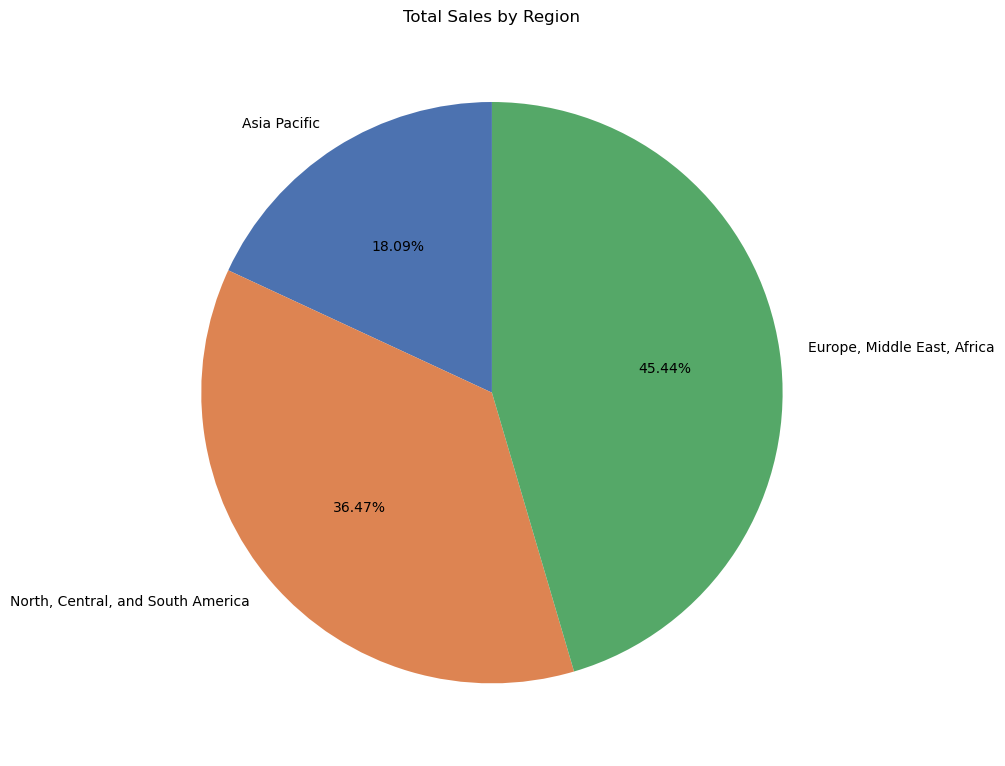

In [174]:
regions = {'EMEA' : 'Europe, Middle East, Africa',
           'APJ'  : 'Asia Pacific',
           'AMER' : 'North, Central, and South America'}

region_sales['Region Label'] = region_sales['Region'].replace(regions)

data = region_sales['Sales']
plt.figure(figsize=(10, 10))
plt.pie(data, labels= region_sales['Region Label'], autopct='%1.2f%%', startangle=90, colors=sns.color_palette("deep"))
plt.tight_layout()
plt.title('Total Sales by Region')
plt.show()

Insight:
- EMEA (Europe, Middle East, and Africa): **45.44%**
  - This is the largest contributor for total sales which consist of nearly half of all sales.
  - Strong customer base and sales network in this region
- AMER (North, Centra, and South America): **36.47**
  - Second largest contributor that is considered significant since it is more or less one-third of total sales.
  - Smaller market and customer base compared to EMEA region.
- APJ (Asia Pacific): **18.09%**
  - The smallest share for total sales, less than 1/5 of global sales.
  - Indicate weaker penetration to market, lower deman, or potential for growth compared to EMEA and AMER.

### D.2 Statistical Testing

#### D.2.1 Sales Performance
**Question** : Do average sales per customer differ significantly across product categories?

Hypothesis   :
- H0         : The average sales per customer are the same across all product categories.
- H1         : The average sales per customer are not the same for all product categories (at least one category differs significantly).

In [59]:
sales_per_product = df.groupby('Product')['Sales'].mean().reset_index()
sales_per_product.columns = ['Product', 'Mean Sales']
sales_per_product

,Product,Mean Sales
0,Alchemy,2198.941618
1,Big Ol Database,1645.553313
2,ChatBot Plugin,34.068834
3,ContactMatcher,222.789503
4,Data Smasher,215.974604
5,FinanceHub,347.538649
6,Marketing Suite,503.859633
7,Marketing Suite - Gold,264.590553
8,OneView,230.755710
9,SaaS Connector Pack,95.825668


C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


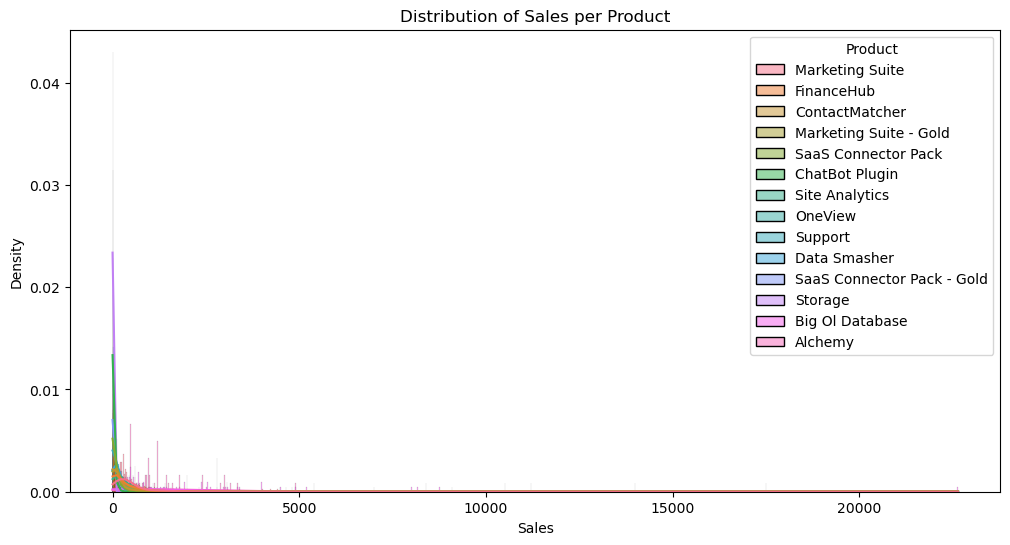

In [60]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Sales', hue='Product', kde=True, stat='density', common_norm=False)
plt.title('Distribution of Sales per Product')
plt.show()

In [180]:
# Normality Test #
from scipy.stats import shapiro

stat, p_value = shapiro(sales_per_product['Mean Sales'])

if p_value > 0.05:
    print(f'p_value = {p_value:.3f}, The data is normally distributed')
else:
    print(f'p_value = {p_value:.3f}, The data is not normally distributed')

p_value = 0.000, The data is not normally distributed


Insight:
- Graph is right skewed.
- Graph is **not** normally distributed.
- Statistical testing using ANOVA

In [62]:
sales_by_product = [group['Sales'].values for sales_by_product, group in df.groupby('Product')]

In [63]:
# Statistical testing #
f_stat, p_value = stats.f_oneway(*sales_by_product)
print(f'Anova F-Stat: {f_stat:.2f}, p_value: {p_value:.4f}')

Anova F-Stat: 152.57, p_value: 0.0000


In [64]:
# Interpret result

if p_value > 0.05:
    print(f'p_value = {p_value:.3f}, Accept H0')
else:
    print(f'p_value = {p_value:.3f} Accept H1')

p_value = 0.000 Accept H1


**CONCLUSION**

The average sales per customer are not the same for all product categories (at least one 
category differs significantly).

#### D.2.2 Regional Profit
**Question** : Is there a statistically significant difference in profit-to-sales ratio between AMER, APJ, and EMEA regions?

Hypothesis   :
- H0         : The median profit-to-sales ratio is the same across AMER, APJ, and EMEA.
- H1         : At least one region’s median profit-to-sales ratio is different.

In [67]:
# sales by region #
region_profit = df.groupby('Region')['Profit Sales Ratio'].mean().reset_index()
region_profit

,Region,Profit Sales Ratio
0,AMER,0.218749
1,APJ,-0.149975
2,EMEA,0.169981


In [68]:
# Normality Test for AMER Region#
from scipy.stats import shapiro
amer_sales_ratio = df[df['Region'] == 'AMER']['Profit Sales Ratio']

stat, p_value = shapiro(amer_sales_ratio)

if p_value > 0.05:
    print(f'p_value = {p_value:.3f}, The data is normally distributed')
else:
    print(f'p_value = {p_value:.3f}, The data is not normally distributed')

p_value = 0.000, The data is not normally distributed


In [69]:
# Normality Test for APJ Region#
from scipy.stats import shapiro
apj_sales_ratio = df[df['Region'] == 'APJ']['Profit Sales Ratio']

stat, p_value = shapiro(apj_sales_ratio)

if p_value > 0.05:
    print(f'p_value = {p_value:.3f}, The data is normally distributed')
else:
    print(f'p_value = {p_value:.3f}, The data is not normally distributed')

p_value = 0.000, The data is not normally distributed


In [70]:
# Normality Test for EMEA Region#
from scipy.stats import shapiro
emea_sales_ratio = df[df['Region'] == 'EMEA']['Profit Sales Ratio']

stat, p_value = shapiro(emea_sales_ratio)

if p_value > 0.05:
    print(f'p_value = {p_value:.3f}, The data is normally distributed')
else:
    print(f'p_value = {p_value:.3f}, The data is not normally distributed')

p_value = 0.000, The data is not normally distributed


**SUMMARY**

AMER, APJ, and EMEA region profit to sales ratio are not normally distributed.

Statistical testing : **KRUSKAL-WALLIS Test** (Compares median across more than 2 independent group)

In [72]:
# Separate profit to sales ratio by region #
amer = df[df['Region'] == 'AMER']['Profit Sales Ratio']
apj = df[df['Region'] == 'APJ']['Profit Sales Ratio']
emea = df[df['Region'] == 'EMEA']['Profit Sales Ratio']

In [73]:
from scipy.stats import kruskal

stat, p = kruskal(amer, apj, emea)
print(f"Kruskal-Wallis H-statistic: stat = {stat:.3f}, p_value: {p:.4f}")

Kruskal-Wallis H-statistic: stat = 347.821, p_value: 0.0000


In [74]:
# Interpret result

if p_value > 0.05:
    print(f'p_value = {p_value:.3f}, Accept H0')
else:
    print(f'p_value = {p_value:.3f} Accept H1')

p_value = 0.000 Accept H1


**CONCLUSION**

At least one region’s median profit-to-sales ratio is different.

### D.2.3 Average City Sales Between AMER, EMEA, and APJ
**Question** : Do average city sales vary significantly between AMER, EMEA, and APJ?

Hypothesis :

- H0 : The average city sales are the same across the three regions
- H1 : At least one region’s average city sales is significantly different from the others.

##### Normality Test


In [78]:
# Aggregate Sales per City #
city_sales = df.groupby(['Region', 'City'])['Sales'].sum().reset_index()
city_sales

,Region,City,Sales
0,AMER,Alexandria,27.880
1,AMER,Anaheim,979.300
2,AMER,Antofagasta,5006.836
3,AMER,Arlington,2044.471
4,AMER,Atlanta,3366.310
...,...,...,...
257,EMEA,Warsaw,12899.280
258,EMEA,Woking,7657.666
259,EMEA,Yekaterinburg,1067.942
260,EMEA,Zagreb,1315.560


In [79]:
from scipy.stats import shapiro
for region in city_sales['Region'].unique():
    sales_data = city_sales[city_sales['Region'] == region]['Sales']
    
    stat, p_value = shapiro(sales_data)

    print(f'Region: {region}')
    print(f'Shapiro-Wilk stat = {stat:.3f}, p_value = {p_value:.3f}')

    
# Create a loop to take city_sales dataframe and gets a list of all distinct region names (AMER, EMEA, APJ).
# Loops over each region one by one #
# Filters the dataframe to only rows belonging to current region #
# Select sales column for chosen row #
# Gives series of sales values for that region #

Region: AMER
Shapiro-Wilk stat = 0.330, p_value = 0.000
Region: APJ
Shapiro-Wilk stat = 0.605, p_value = 0.000
Region: EMEA
Shapiro-Wilk stat = 0.273, p_value = 0.000


**CONCLUSION**

The data is not normally distributied therefore the statistical test should be non-parametric and since the problem is comparing average city sales between AMER, EMEA, and APJ. 

Statistical Test: **KRUSKAL-WALLIS TEST**

In [81]:
from scipy.stats import kruskal
amer_sales = city_sales[city_sales['Region'] == 'AMER']['Sales']
apj_sales = city_sales[city_sales['Region'] == 'APJ']['Sales']
emea_sales = city_sales[city_sales['Region'] == 'EMEA']['Sales']

# Kruskal-Wallis Test #'
stat, p_value = kruskal(amer_sales, apj_sales, emea_sales)

print(f'Kruskal-Wallis H-statistic = {stat:.3f}, p_value = {p_value:.3f}')

Kruskal-Wallis H-statistic = 17.311, p_value = 0.000


In [82]:
# Interpretation #
if p_value > 0.05:
    print(f'p_value = {p_value:.3f}, Accept H0')
else:
    print(f'p_value = {p_value:.3f}, Accept H1')

p_value = 0.000, Accept H1


**CONCLUSION**

At least one region’s average city sales is significantly different from the others.

## E. Conclusion
### E.1 Sales Performance Over Time
- Sales consistently peak in Q4, suggesting strong seasonal demand toward year-end.
- Q1 is the weakest quarter, highlighting a recurring slump at the start of each year.

### E.2 Customer Segmentation Churn Risk
- A large proportion of customers are Low Spenders, making them the segment most vulnerable to churn.
- High spending customers such as Anthem, Ford Motor, and Allianz contribute a significant share of revenue, indicating concentration risk.

### E.3 Product & Profitability
- High sales volume products (ContactMatcher, FinanceHub, Site Analytics) do not always yield the highest profit.
- Alchemy is the most profitable product despite lower sales volume, showing that focusing on profitability may be more impactful than pushing only top-selling products.

### E.4 Regional Performance
- EMEA contributes nearly half (45.4%) of total sales, making it the company’s strongest market.
- AMER contributes one-third (36.5%), while APJ lags (18.1%), showing untapped growth potential.

### E.5 Statistical Insights
- **Product Categories**:  Significant differences exist in average sales per customer across categories (ANOVA, p=0.000). This means some product categories perform much better than others.
- **Profit-to-Sales Ratio by Region**: Statistically different across regions (Kruskal-Wallis, p=0.000). Certain regions (likely AMER or EMEA) are more efficient in turning sales into profit.
- **Average City Sales Across Regions**: Also significantly different (Kruskal-Wallis, p=0.000), highlighting regional disparities in sales performance.

## F. Actionable Recommendations

### F.1 Seasonality Management
- Launch promotional campaigns in Q1 to mitigate the recurring sales slump.
- Optimize inventory and marketing in Q4 to fully capture the seasonal peak without stockouts.

### F.2 Customer Retention and Segmentation
- Develop engagement strategies (loyalty programs, targeted offers) for Low Spender segments to reduce churn risk.
- Protect revenue concentration risk by building long-term partnerships with top customers (Anthem, Ford, Allianz).

### F.3 Product Strategy 
- Balance between high-volume products (to maintain sales momentum) and high-profit products like Alchemy (to maximize margins).
- Invest in cross-selling strategies that pair high-profit with high-sales products.

### F.4 Regional Focus
- **EMEA**: Maintain strong operations but avoid over-dependence; explore diversification.
- **AMER**: Strengthen growth initiatives as the region shows significant contribution and healthy profitability ratios.
- **APJ**: Allocate resources to market development and brand presence, as statistical analysis shows APJ underperforms but holds growth potential.

### F.5 Profit Optimization
- Since profit-to-sales ratios differ significantly across regions, review pricing strategies, operational efficiency, and cost structures per region. Focus especially on lifting APJ’s profitability closer to AMER/EMEA benchmarks.

### F.6 Recommended Data Driven Strategy
- Use predictive analytics to anticipate seasonal demand more accurately.
- Monitor product-level profitability continuously rather than focusing only on sales volume.

## Save Cleaned Data

In [85]:
columns_to_keep = [
    'Order ID', 'Order Date', 'Customer ID', 'Customer', 
    'Region', 'Country', 'City', 'Product', 'Sales', 'Quantity', 
    'Profit']

df_clean = df[columns_to_keep]

df_clean

df_clean.to_csv("SaaS_clean_new.csv", index=False)